In [36]:
# Importing the necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Setting visualizations to appear inline (for Jupyter Notebook)
%matplotlib inline

In [37]:
# Load the Titanic dataset
dataset = pd.read_csv('train.csv')  # Adjust the path as per your system

# Display the first few rows of the dataset to understand its structure
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
# Check the shape of the dataset (number of rows and columns)
print(f"The dataset contains {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

# Get a quick overview of the data types, null values, and non-null counts
dataset.info()

# Check basic statistics for numerical columns
dataset.describe()

# Display unique values in categorical features
for col in dataset.select_dtypes(include='object').columns:
    print(f"Unique values in {col}: {dataset[col].unique()}")

The dataset contains 891 rows and 12 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Unique values in Name: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William

Missing values in each column:
Age         177
Cabin       687
Embarked      2
dtype: int64


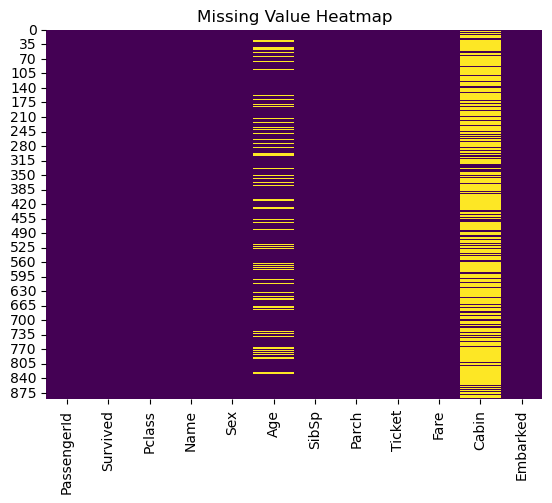

In [39]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Visualize missing values
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

In [40]:
# Fill missing 'Age' using median grouped by 'Pclass' and 'Sex'
dataset['Age'] = dataset.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Fill missing 'Embarked' with the most frequent value (mode)
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column (too many missing values, unfeasible to impute)
dataset.drop('Cabin', axis=1, inplace=True)

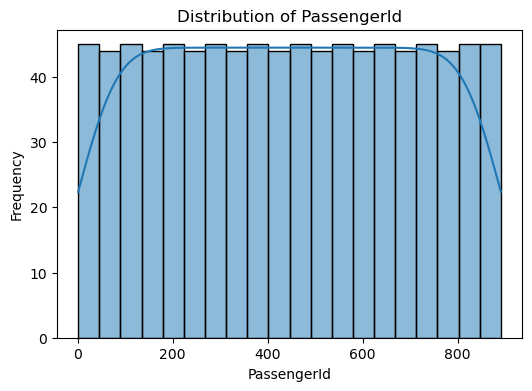

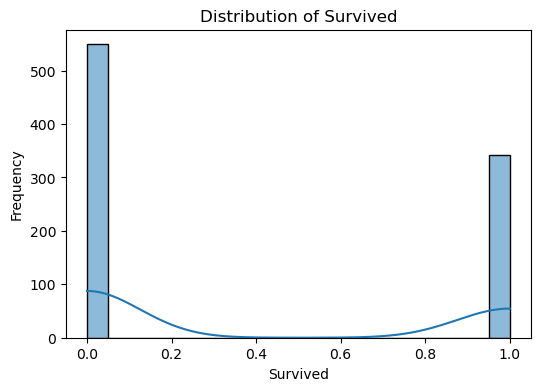

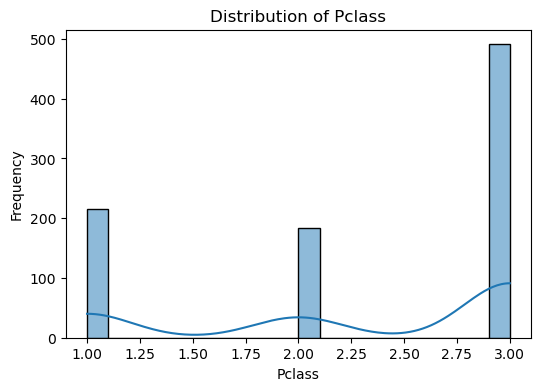

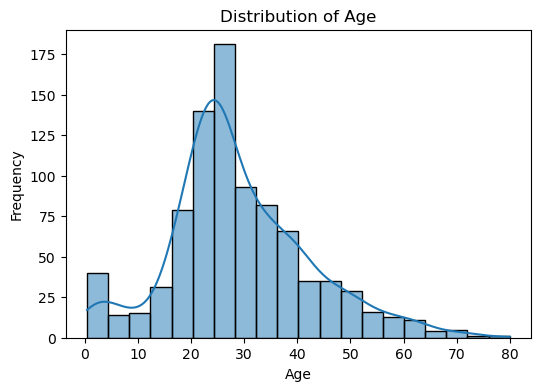

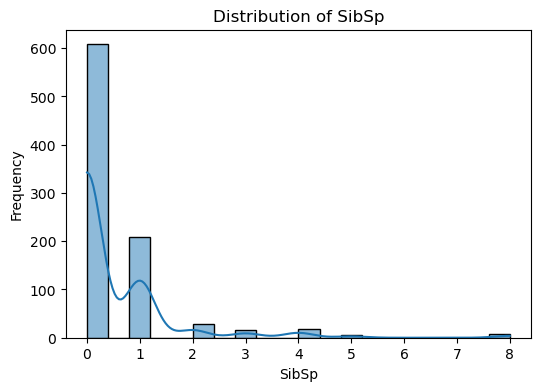

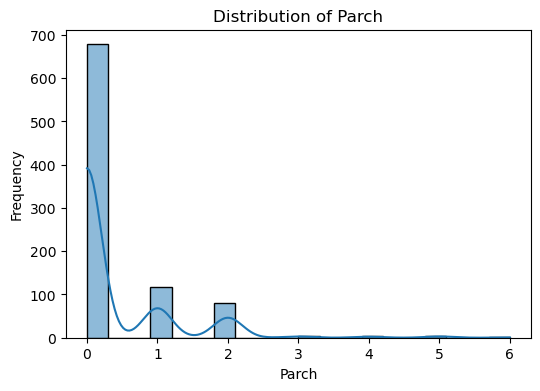

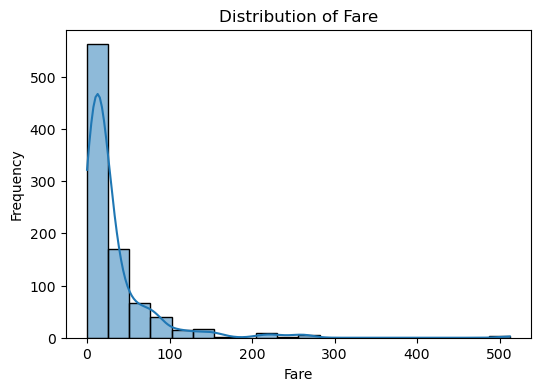

In [41]:
# Plot histograms for numerical features
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'object']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset[feature], kde=True, bins=20)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

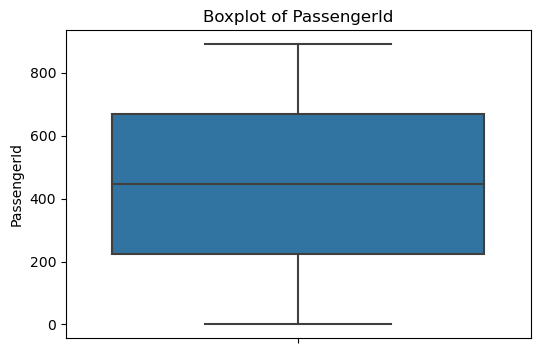

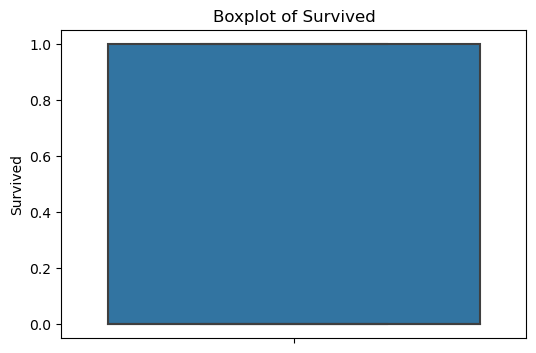

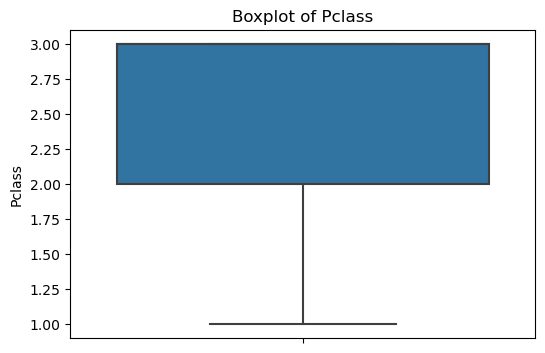

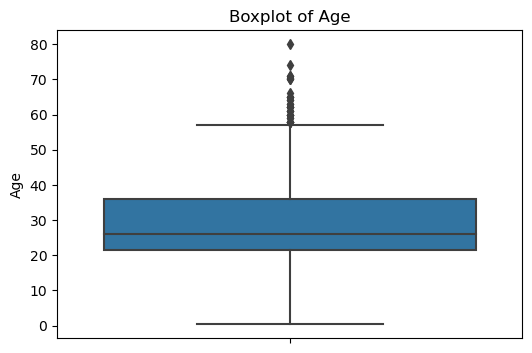

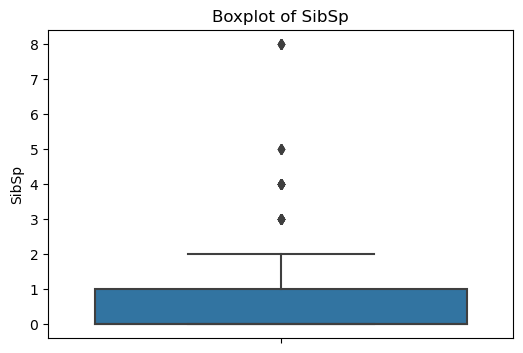

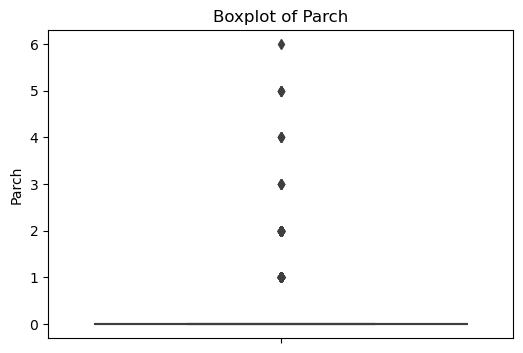

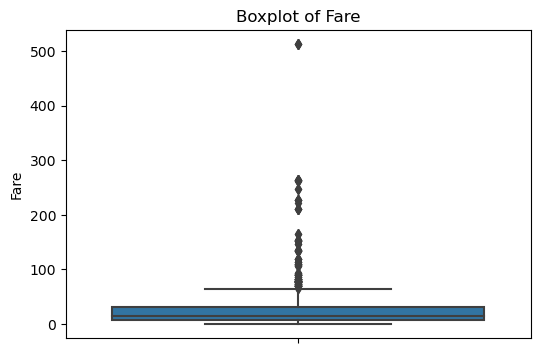

In [42]:
# Visualize outliers using boxplots
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=dataset[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

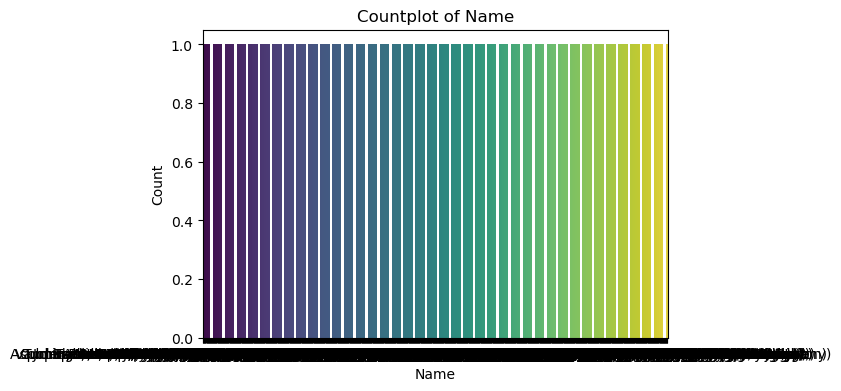

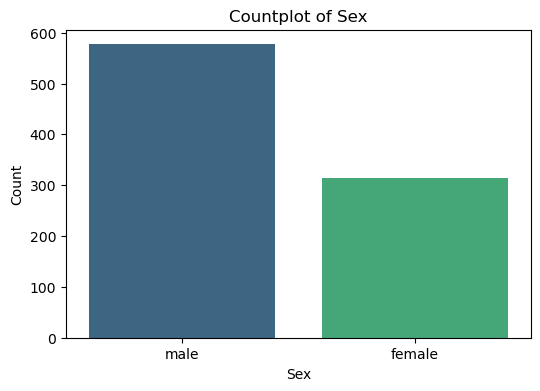

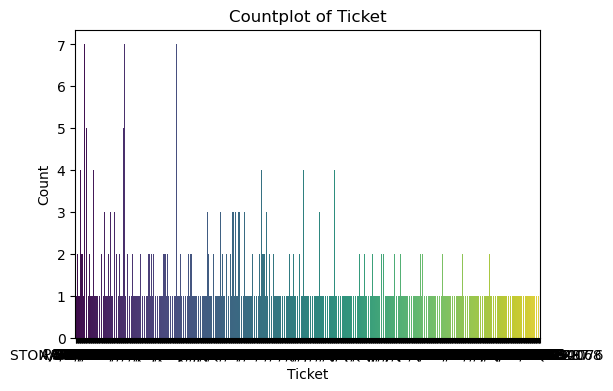

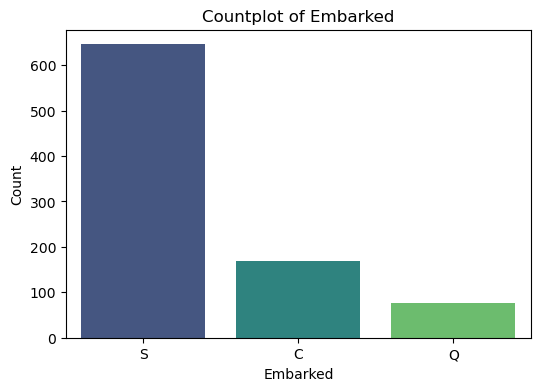

In [43]:
# Analyze categorical features
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'object']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=dataset[feature], palette='viridis')
    plt.title(f"Countplot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

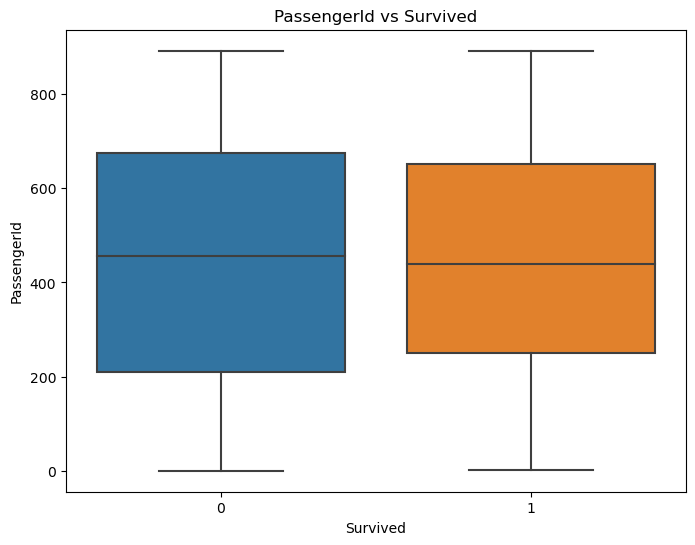

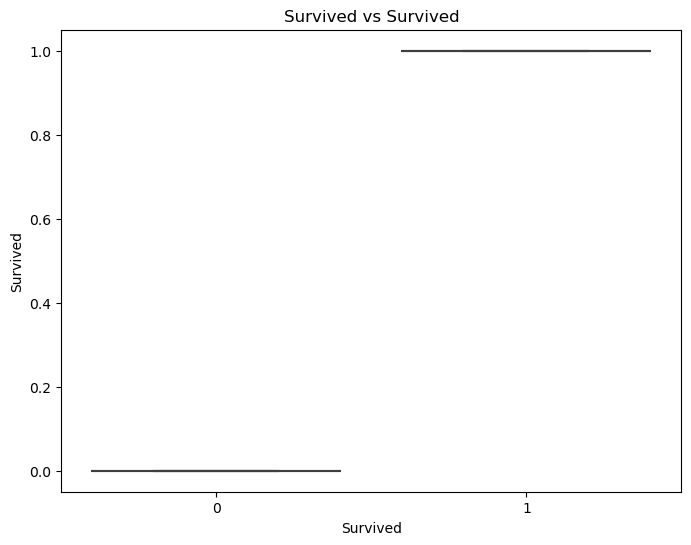

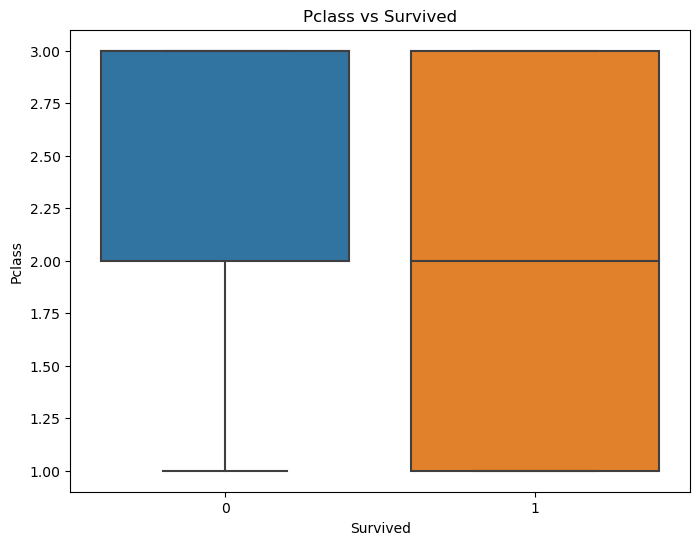

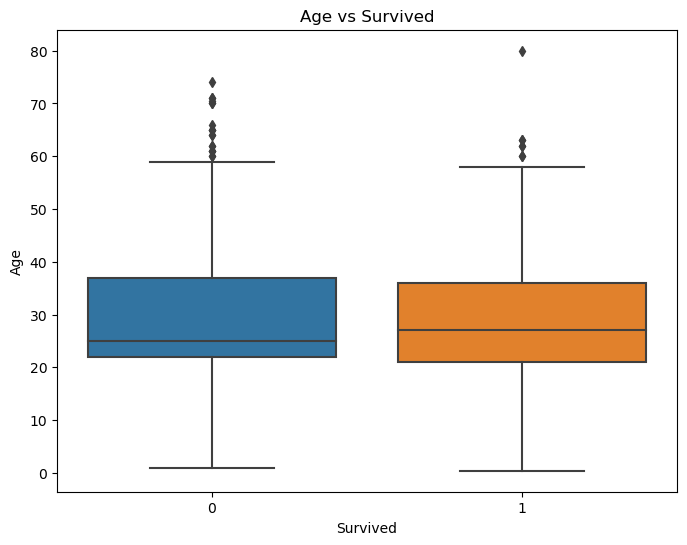

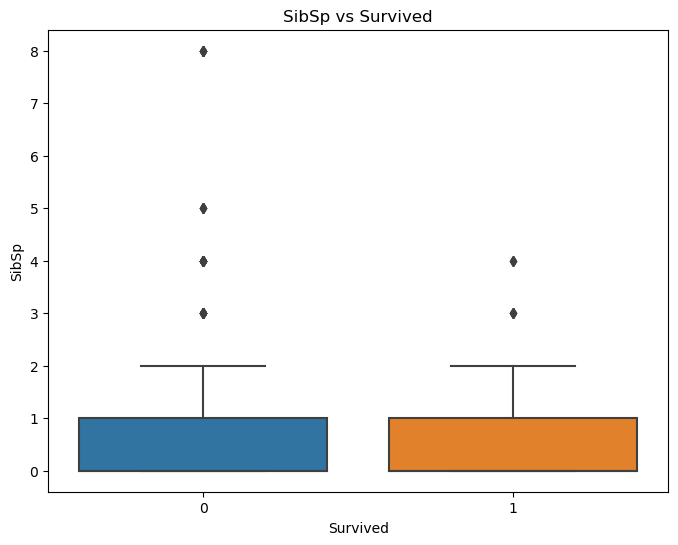

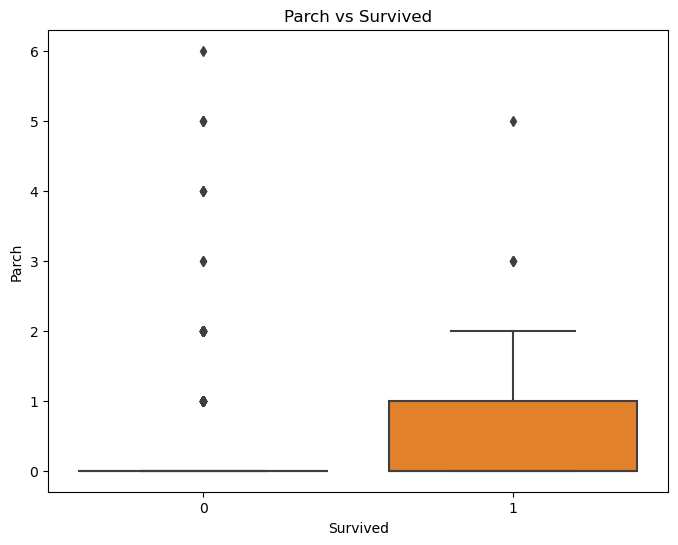

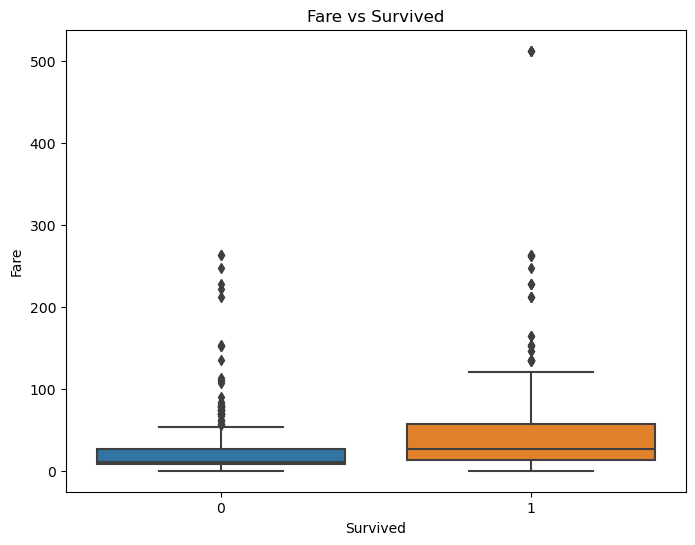

C:\Users\Admin\AppData\Local\Temp\ipykernel_194772\2081576987.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=dataset[feature], y=dataset['Survived'], ci=None, palette='viridis')


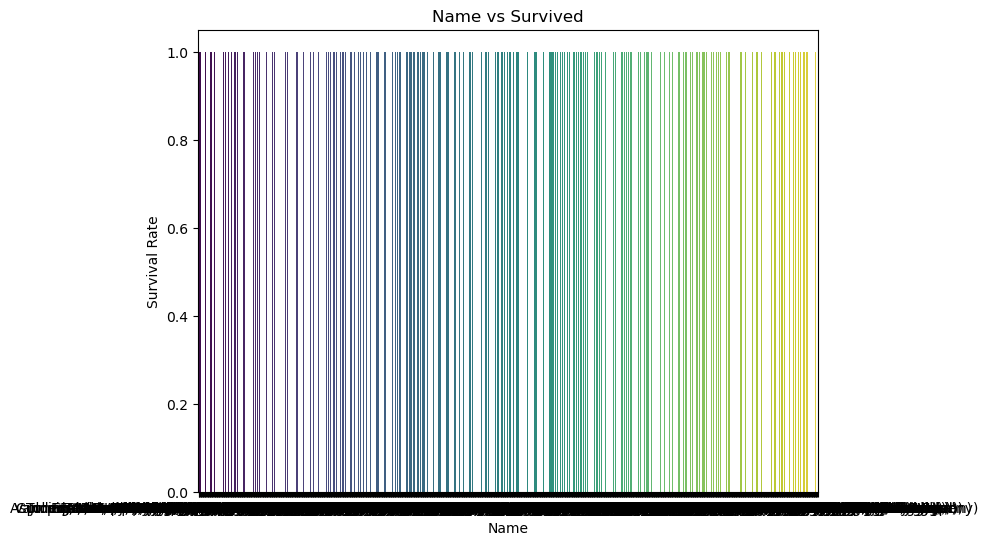

C:\Users\Admin\AppData\Local\Temp\ipykernel_194772\2081576987.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=dataset[feature], y=dataset['Survived'], ci=None, palette='viridis')


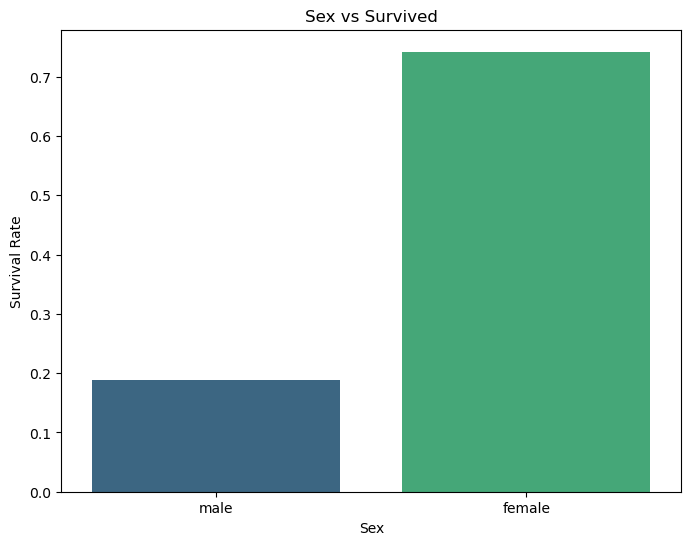

C:\Users\Admin\AppData\Local\Temp\ipykernel_194772\2081576987.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=dataset[feature], y=dataset['Survived'], ci=None, palette='viridis')


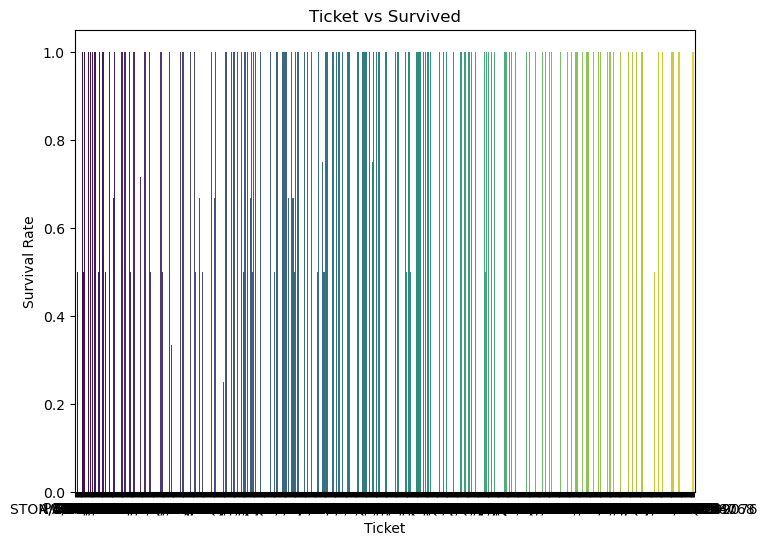

C:\Users\Admin\AppData\Local\Temp\ipykernel_194772\2081576987.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=dataset[feature], y=dataset['Survived'], ci=None, palette='viridis')


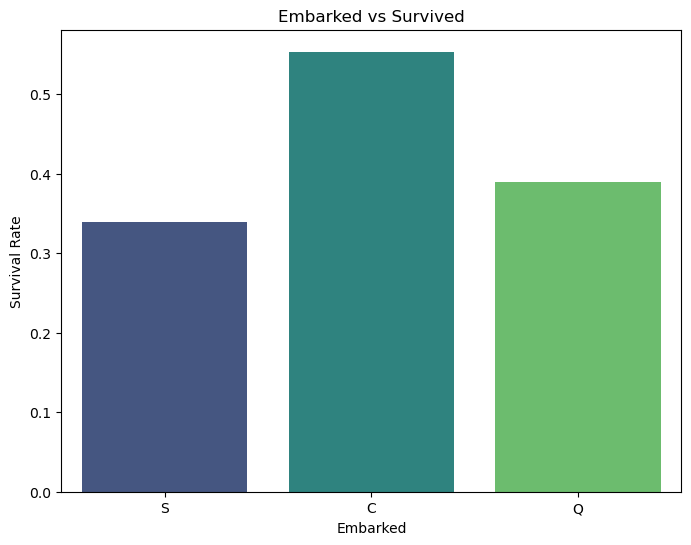

In [44]:
# Numerical Features vs Target
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dataset['Survived'], y=dataset[feature])
    plt.title(f"{feature} vs Survived")
    plt.xlabel("Survived")
    plt.ylabel(feature)
    plt.show()

# Categorical Features vs Target
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=dataset[feature], y=dataset['Survived'], ci=None, palette='viridis')
    plt.title(f"{feature} vs Survived")
    plt.xlabel(feature)
    plt.ylabel("Survival Rate")
    plt.show()

In [45]:
# Perform one-hot encoding for 'Embarked'
dataset = pd.get_dummies(dataset, columns=['Embarked'], drop_first=True)

# Map 'Sex' to numerical (Male: 1, Female: 0)
dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0})

In [46]:
# Family Size
dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1

# Is Alone (1 if alone, 0 otherwise)
dataset['Is_Alone'] = np.where(dataset['Family_Size'] == 1, 1, 0)

# Age Bins
dataset['Age_Bin'] = pd.cut(dataset['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teenager', 'Adult', 'Middle_Aged', 'Senior'])

# Fare Bins
dataset['Fare_Bin'] = pd.qcut(dataset['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very_High'])

In [47]:
# Check the final dataset structure
dataset.info()

# Verify if there are any remaining missing values
print("Remaining missing values:", dataset.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked_Q   891 non-null    bool    
 11  Embarked_S   891 non-null    bool    
 12  Family_Size  891 non-null    int64   
 13  Is_Alone     891 non-null    int32   
 14  Age_Bin      891 non-null    category
 15  Fare_Bin     891 non-null    category
dtypes: bool(2), category(2), float64(2), int32(1), int64(7), object(2)
memory usage: 84.1+ KB
Remaining missing values: 

In [48]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Family_Size,Is_Alone,Age_Bin,Fare_Bin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True,2,0,Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False,2,0,Adult,Very_High
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True,1,1,Adult,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True,2,0,Adult,Very_High
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True,1,1,Adult,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,False,True,1,1,Adult,Medium
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,False,True,1,1,Teenager,High
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.5,1,2,W./C. 6607,23.4500,False,True,4,0,Adult,High
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,False,False,1,1,Adult,High
